In [350]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

## Modelo Simple

In [351]:
path = "datos_gente_1.csv"
df_first = pd.read_csv(path)

In [352]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(df_first.drop("height", axis=1), df_first["height"], test_size=0.2, random_state=99)

In [353]:
lr_first = LinearRegression()
lr_first.fit(x_test_f, y_test_f)
pred_first = lr_first.predict(x_test_f)
print(f"R2: {r2_score(y_test_f, pred_first)} RMSE: {root_mean_squared_error(y_test_f, pred_first)}")

R2: 0.9223243980698042 RMSE: 2.3155505152755116


## Modelo Iteso

In [354]:
path = "datos_gente_1.csv"

df_comb = pd.read_csv(path)

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

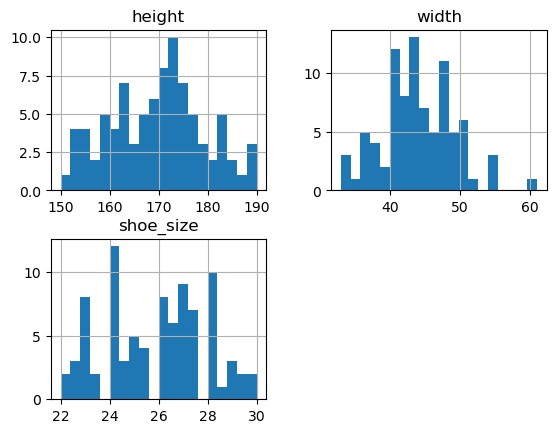

In [355]:
df_comb.hist(bins=20)

In [356]:
X = df_comb[["width", "shoe_size"]]
y = df_comb["height"]

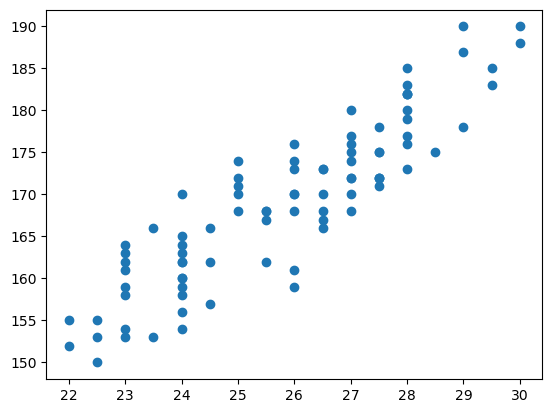

In [357]:
plt.scatter(df_comb["shoe_size"], df_comb["height"])

In [358]:
q25 = np.quantile(y, 0.25)
q75 = np.quantile(y, 0.75)

df_left = df_comb[df_comb["height"] <= q25]
df_right = df_comb[df_comb["height"] >= q75]
df_center = df_comb[(df_comb["height"] >= q25) & (df_comb["height"] <= q75)] 

In [359]:
def sintetizar_datos(df_a_combinar, df_new):
    X_left = df_new[["width", "shoe_size"]]
    y_left = df_new["height"]

    w_m = np.mean(df_new["width"])
    s_m = np.mean(df_new["shoe_size"])
    h_m = np.mean(df_new["height"])

    w_s = np.std(df_new["width"])
    s_s = np.std(df_new["shoe_size"])
    h_s = np.std(df_new["height"])

    new_data_w = np.random.normal(loc=w_m, scale=w_s, size=100)
    new_data_s = np.random.normal(loc=s_m, scale=s_s, size=100)
    new_data_h = np.random.normal(loc=h_m, scale=h_s, size=100)

    new_sorted_w = sorted(new_data_w)
    new_sorted_s = sorted(new_data_s)
    new_sorted_h = sorted(new_data_h)

    df_new_1 = pd.DataFrame({
        "width": new_sorted_w,
        "shoe_size": new_sorted_s,
        "height": new_sorted_h
    })

    df_new_1 = df_new_1.apply(lambda x: round(x, 0))

    df_a_combinar = pd.concat([df_a_combinar, df_new_1])
    return df_a_combinar

In [360]:
data_left = sintetizar_datos(df_comb, df_left)
data_right = sintetizar_datos(df_comb, df_right)
# df_comb = sintetizar_datos(df_comb, df_center)

In [385]:
len(data_right)

187

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

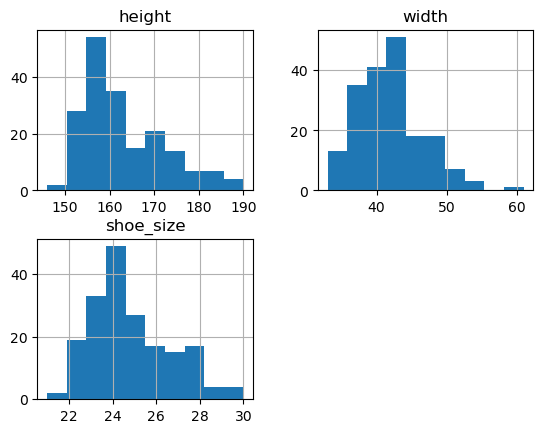

In [424]:
data_left.hist()

In [388]:
x_train_left, x_test_left, y_train_left, y_test_left = train_test_split(data_left.drop("height", axis=1), data_left["height"], test_size= 0.2, random_state=55)
x_train_right, x_test_right, y_train_right, y_test_right = train_test_split(data_right.drop("height", axis=1), data_right["height"], test_size= 0.2, random_state=55)

In [392]:
ss_left = StandardScaler()
ss_right = StandardScaler()


X_train_s_left = ss_left.fit_transform(x_train_left)
X_test_s_left = ss_left.transform(x_test_left)

X_train_s_right = ss_right.fit_transform(x_train_right)
X_test_s_right = ss_right.transform(x_test_right)

In [ ]:
# ridge_params =  {"alpha": np.logspace(-10, 5, 50)}

# ridge = Ridge()
# ridge_gs = GridSearchCV(ridge, ridge_params, scoring="neg_mean_absolute_error", cv=5)
# ridge_gs.fit(X_train_s, y_train)

# print("Ridge Regression:")
# print(f"Best parameters: {ridge_gs.best_params_}")

Ridge Regression:
Best parameters: {'alpha': 1e-10}


In [422]:
values = ss_right.transform([[47,29.5]])

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [423]:
rg.predict(values)

array([184.33086112])

In [427]:
rg = Ridge(alpha = 1.26)
rg.fit(X_train_s_right, y_train_right)
r_pred = rg.predict(X_test_s_right)
print(f"R2: {r2_score(y_test_right, r_pred)} RMSE: {root_mean_squared_error(y_test_right, r_pred)}")

R2: 0.8553426107576959 RMSE: 3.2313276757420777


In [403]:
lr = LinearRegression()
lr.fit(X_train_s_left, y_train_left)
pred_lr = lr.predict(X_test_s_left)
r2_score(y_test_left, pred_lr)

0.7939238544036908

## Paises Bajos

In [370]:
stds = df_comb.std()
mean_pb = (182 + 170) / 2

df_p = df_comb[(df_comb["height"] > mean_pb - stds.iloc[0]) & (df_comb["height"] < mean_pb + stds.iloc[0])]


In [371]:
m_filter = df_p.mean()

In [372]:
pb_h = np.random.normal(loc=mean_pb, scale=stds.iloc[0], size=100)
pb_ss = np.random.normal(loc=m_filter.iloc[1], scale=stds.iloc[1], size=100)
pb_w = np.random.normal(loc=m_filter.iloc[2], scale=stds.iloc[2], size=100)

pb_h = sorted(pb_h)
pb_ss = sorted(pb_ss)
pb_w = sorted(pb_w)

dict = {"height": pb_h, "width": pb_w, "shoe_size": pb_ss}

In [373]:
df_pb = pd.DataFrame(data=dict)
df_pb

,height,width,shoe_size
0,155.880014,22.258075,34.938830
1,159.640765,22.559711,35.025631
2,161.321454,22.650963,35.964060
3,162.369183,22.686053,36.322691
4,162.398224,22.740992,36.407852
...,...,...,...
95,187.736718,30.015103,52.834514
96,190.225748,30.072100,53.653466
97,193.461079,30.118722,54.050160
98,193.507938,30.283906,54.229545


<Axes: >

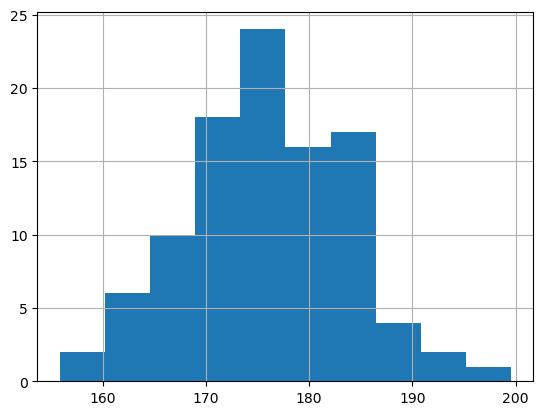

In [374]:
df_pb["height"].hist()

In [375]:
X = df_pb.drop("height", axis=1)
y = df_pb["height"]

In [376]:
x_train_pb, x_test_pb, y_train_pb, y_test_pb = train_test_split(X, y, test_size=0.20, random_state=48)

In [377]:
ss_pb = StandardScaler()
x_train_pb_ss = ss_pb.fit_transform(x_train_pb)
x_test_pb_ss = ss_pb.transform(x_test_pb)

In [378]:
ridge_params =  {"alpha": np.linspace(3, 100, 100)}

ridge = Ridge()
ridge_gs = GridSearchCV(ridge, ridge_params, scoring="neg_root_mean_squared_error", cv=5)
ridge_gs.fit(X_train_s, y_train)

print("Ridge Regression:")
print(f"Best parameters: {ridge_gs.best_params_}")

Ridge Regression:
Best parameters: {'alpha': 3.0}


In [379]:
r_pb = Ridge(alpha= 50)
r_pb.fit(x_train_pb_ss, y_train_pb)
pb_pred = r_pb.predict(x_test_pb_ss)
print(f"R2:{r2_score(y_test_pb, pb_pred)}, RMSE: {root_mean_squared_error(y_test_pb, pb_pred)}")

R2:0.9592425707485487, RMSE: 1.5488651139718776


In [380]:
from mpl_toolkits.mplot3d import Axes3D

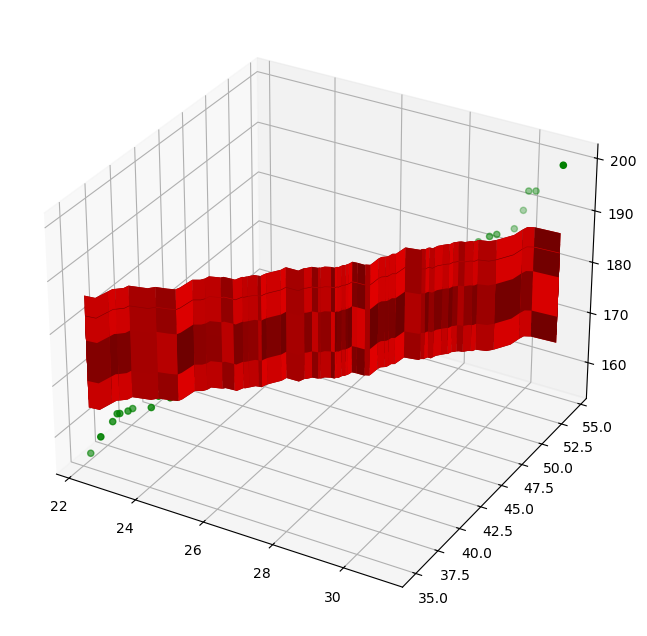

In [381]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df_pb["width"], df_pb["shoe_size"], df_pb["height"] ,color="green")
ax.plot_surface(df_pb["width"], df_pb["shoe_size"], pb_pred.reshape((-1,1)), color="red")
plt.show()

In [382]:
import plotly.express as px
import plotly.graph_objects as go

In [383]:
fig = px.scatter_3d(df_pb, x=df_pb["width"], y=df_pb["shoe_size"], z=df_pb["height"])
fig = go.Figure(data=[go.Surface()])
# fig.show()


In [384]:
class segunda_seccion():
    
    def __init__(self, df):
        self.df = df
        
    def holanda_regressor(self):
        self.pb_pred = r_pb.predict(self.df)
    
    def iteso_regressor(self):
        self.new_pred = rg.predict(self.df)
        print(self.new_pred)
        
    def combined_regressor(self):
        pass
        
    def plotter(self, df, x1, x2, y):
        fig = plt.figure(figsize=((10,8)))    
        ax = fig.add_subplot(projection="3d")
        
        ax.scatter(df[x1], df[x2], df[y])
        ax.plot_surface(df[x1], df[x2], self.new_pred)
        
    
    
    
    # return fig
    
# segunda_seccion(df_center)